In [36]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [38]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
df.iloc[:5,:]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [39]:
cnt = df[0].value_counts()
p0 = cnt['p']/cnt.sum()
z0 = np.log(p0) - np.log(1.0 - p0)
print(p0,z0)
cnt

0.48202855736090594 -0.07191675076714477


0
e    4208
p    3916
Name: count, dtype: int64

# 1. Распределение категориальных признаков

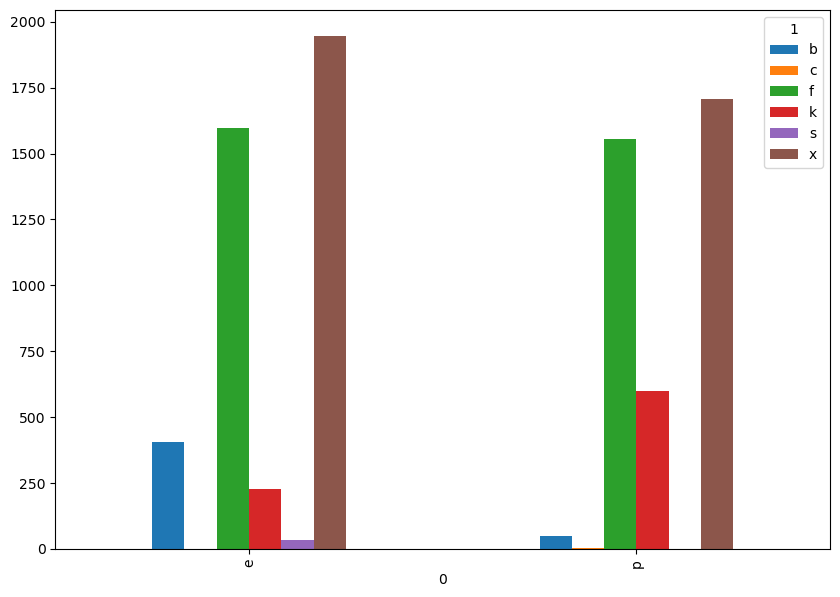

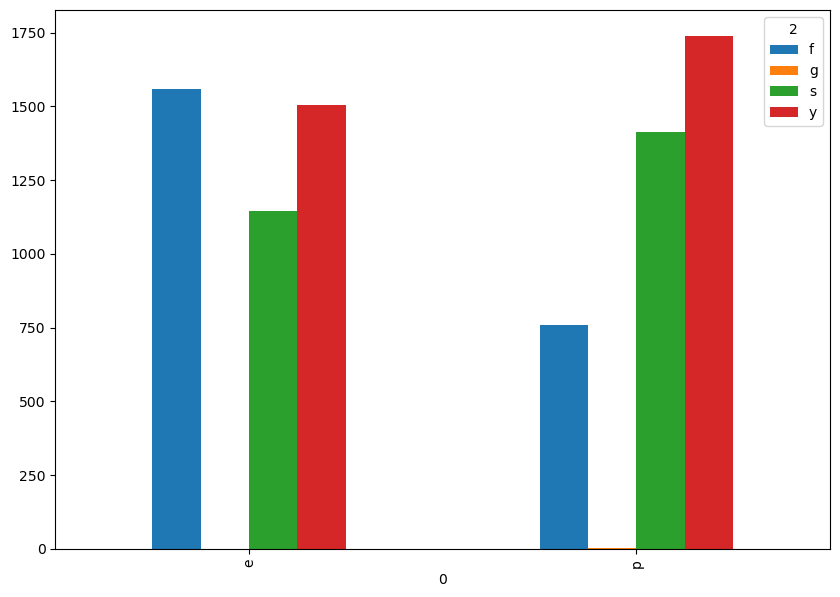

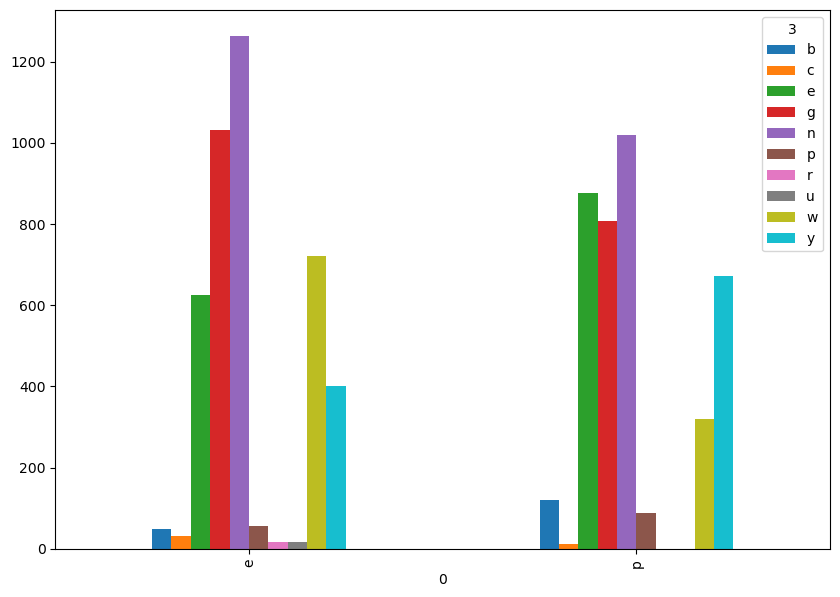

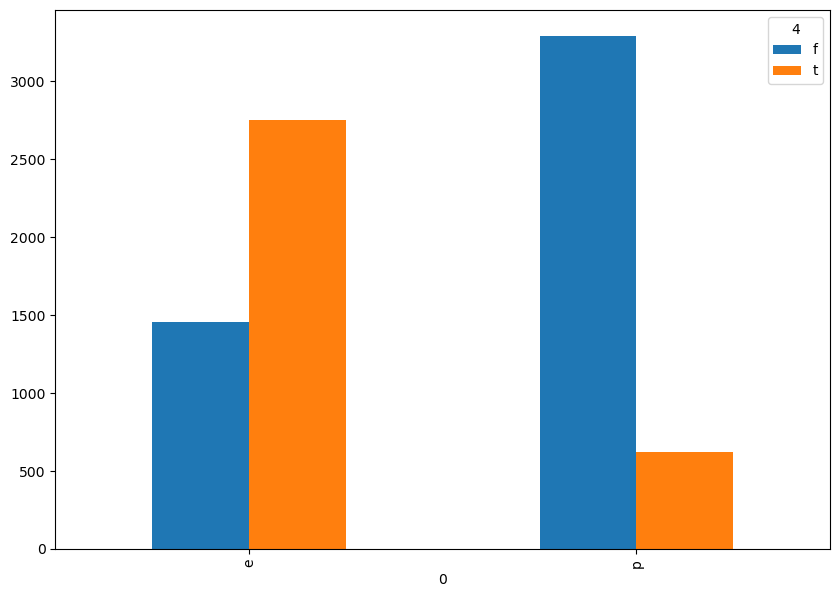

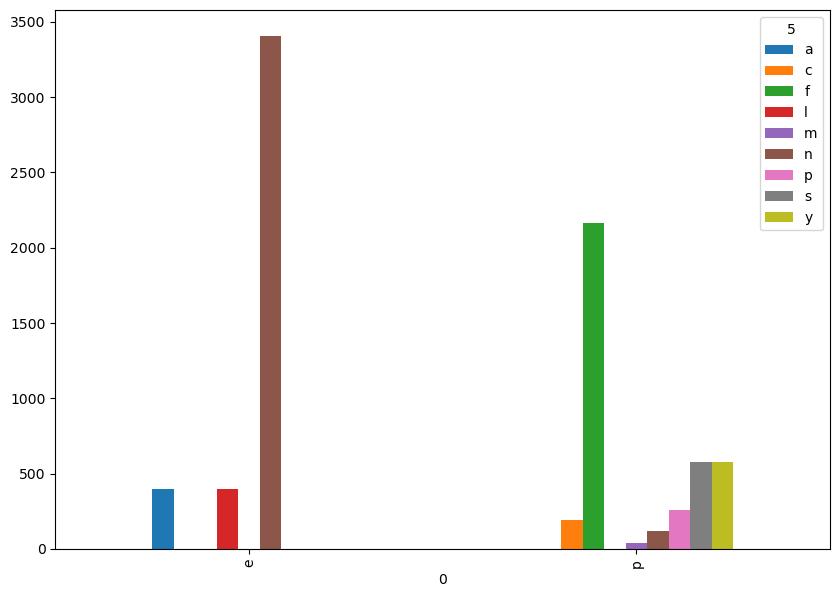

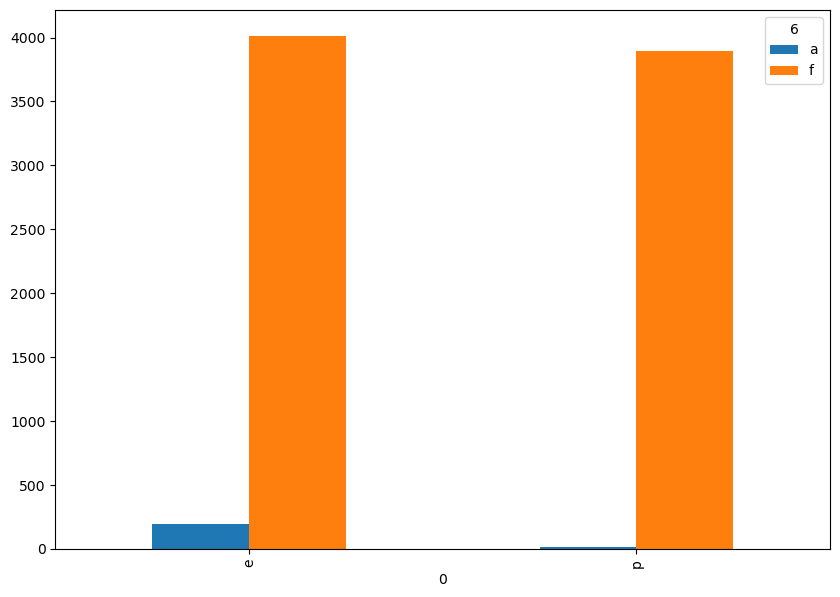

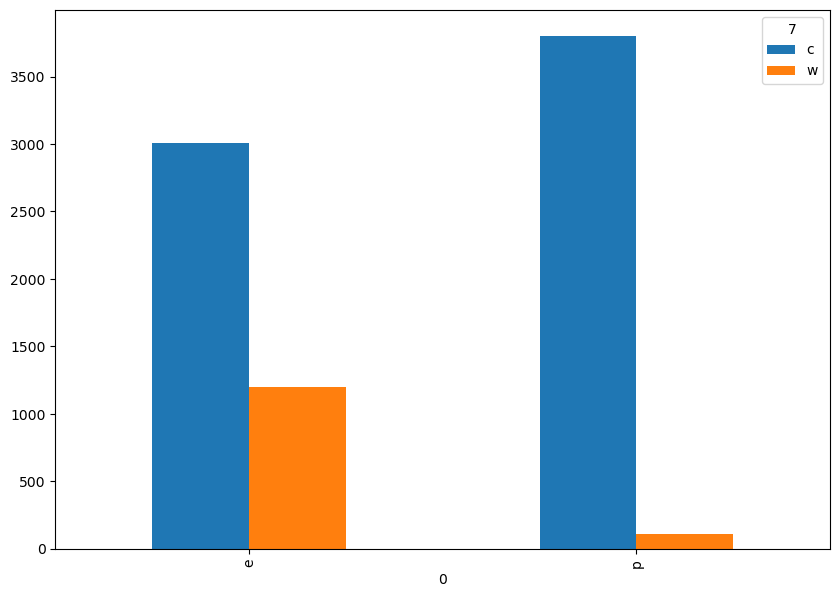

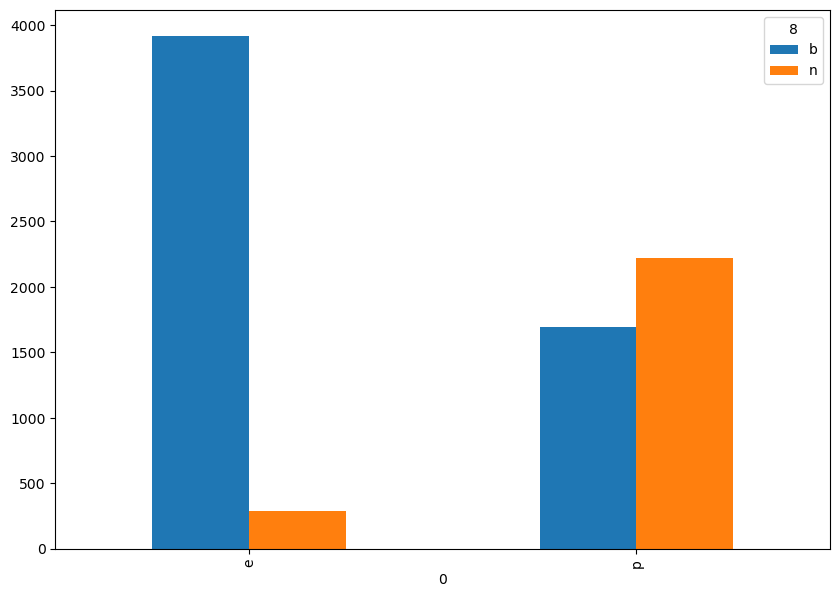

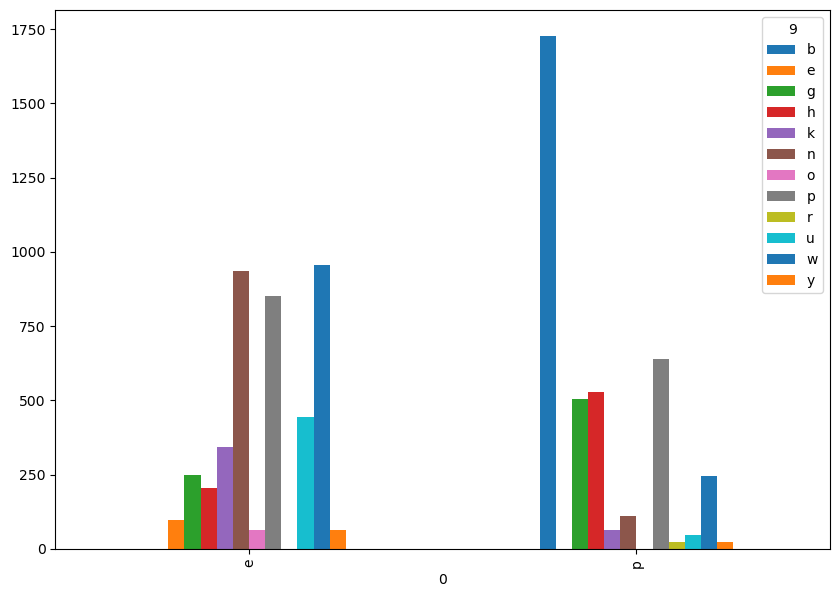

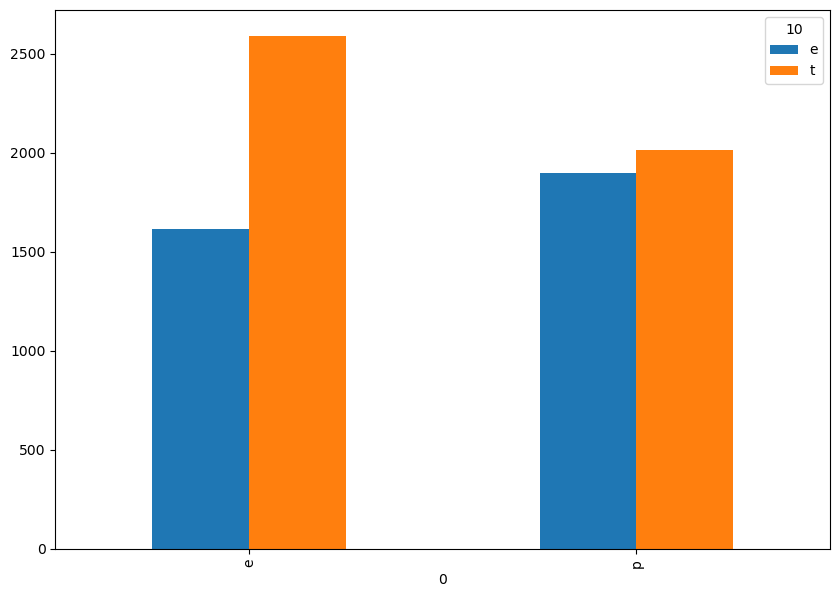

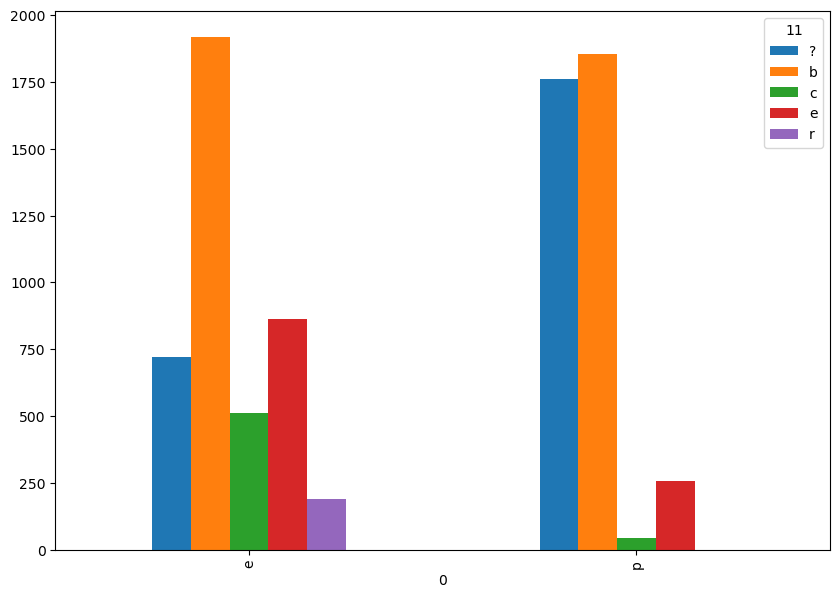

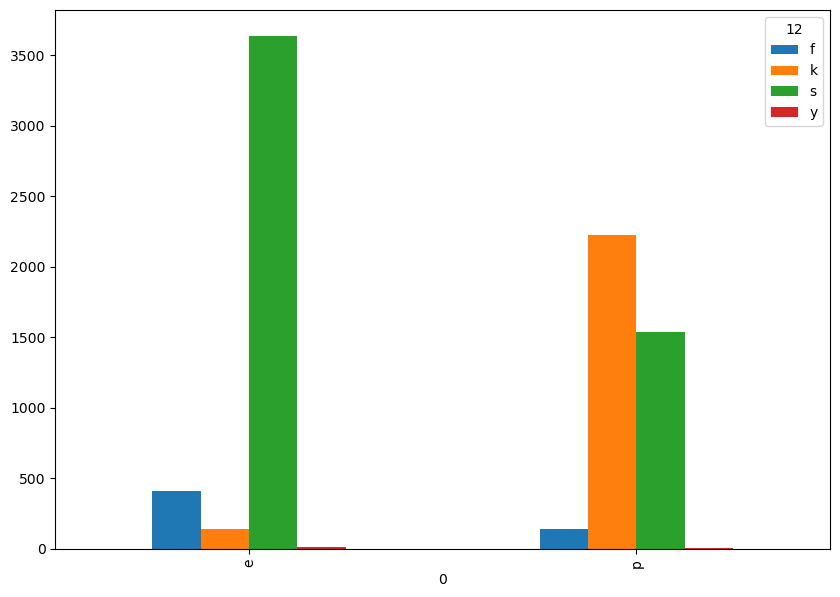

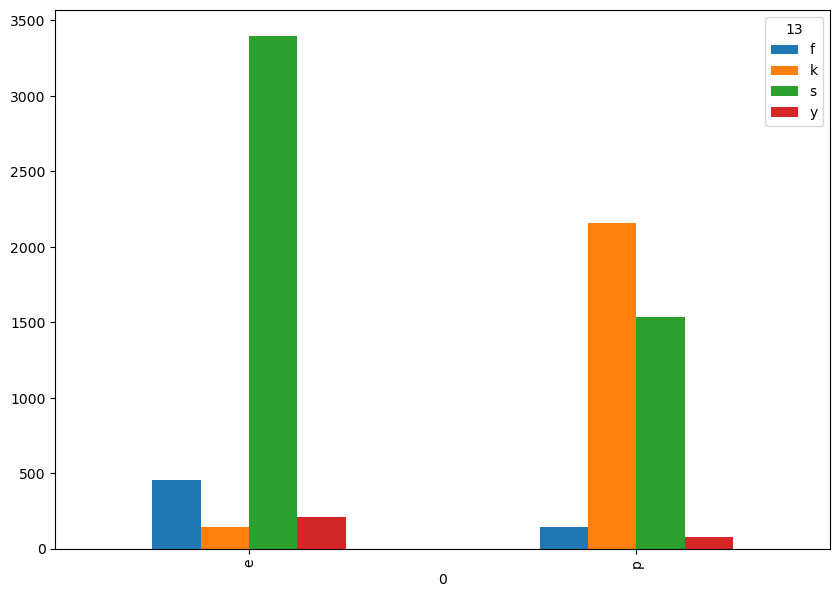

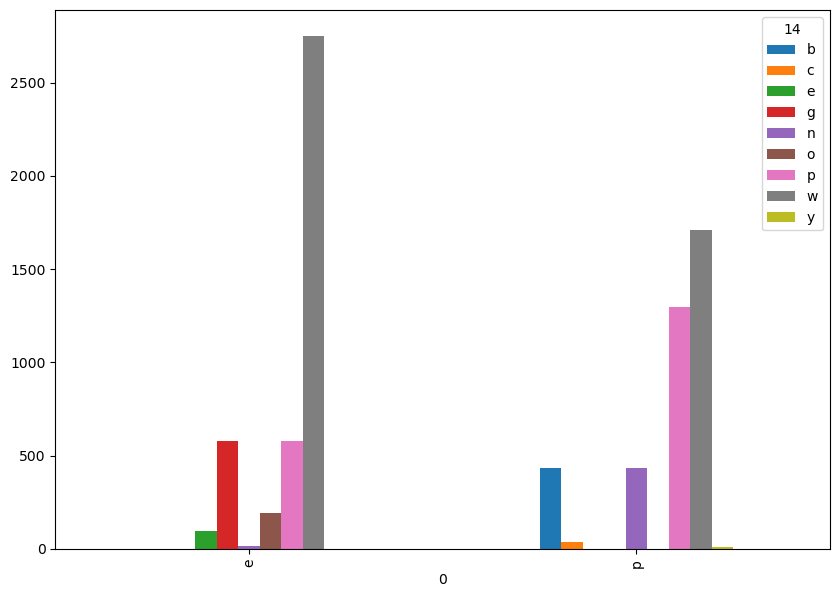

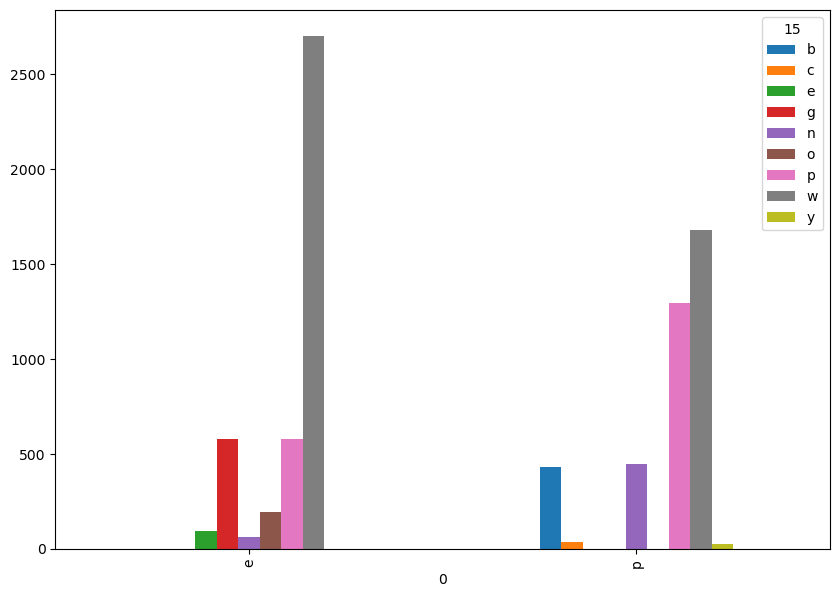

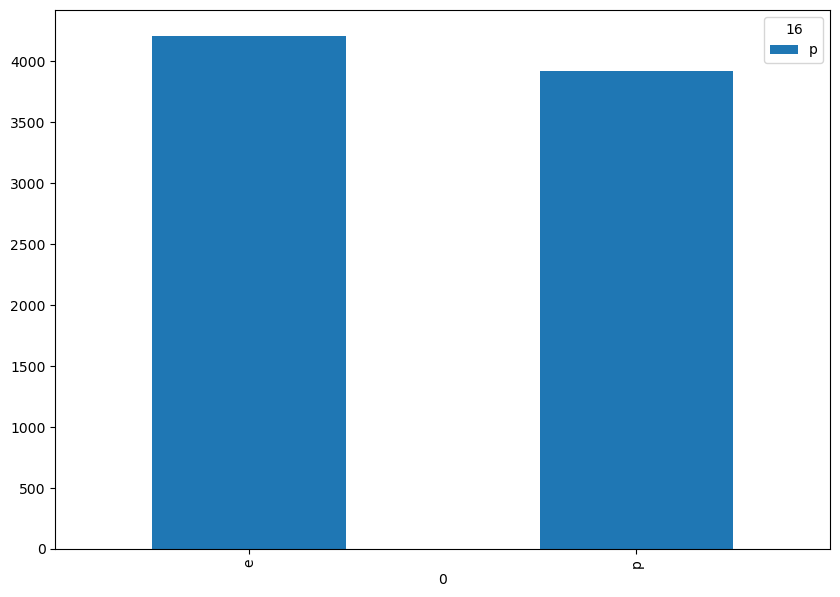

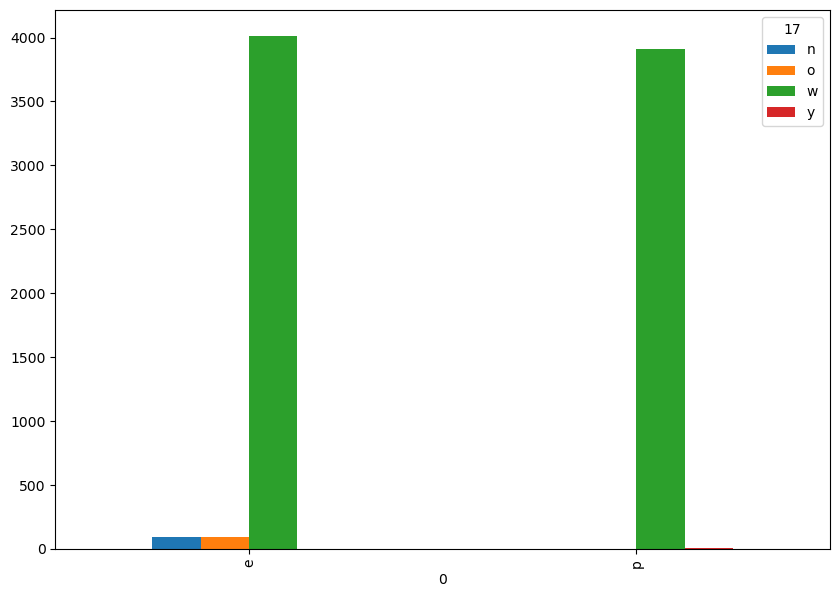

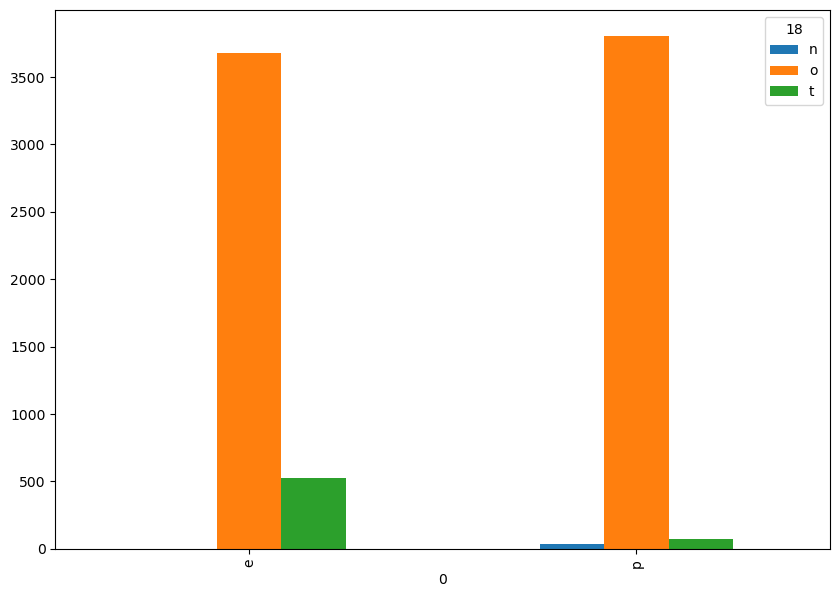

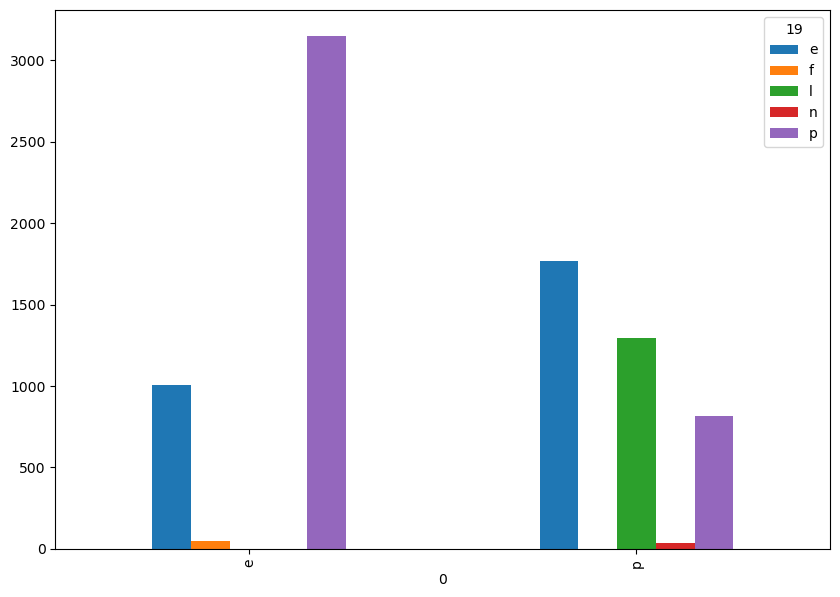

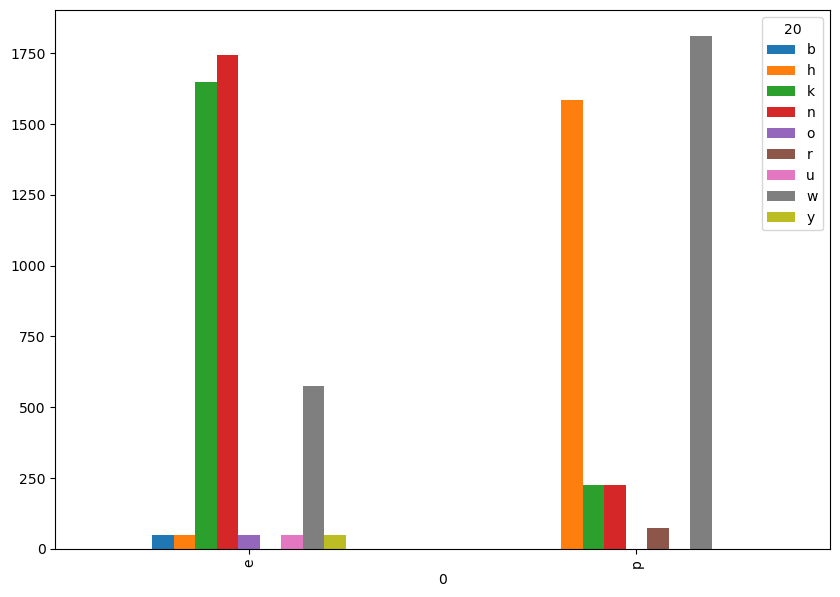

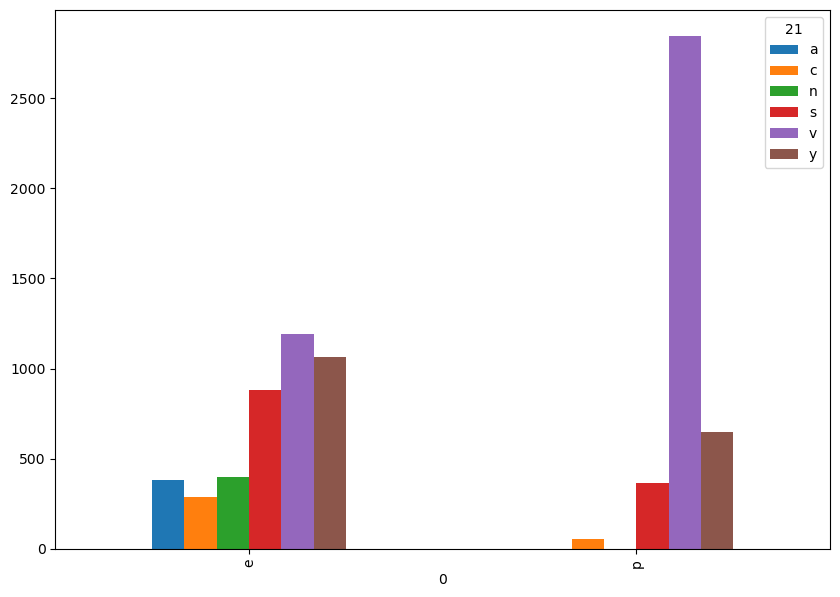

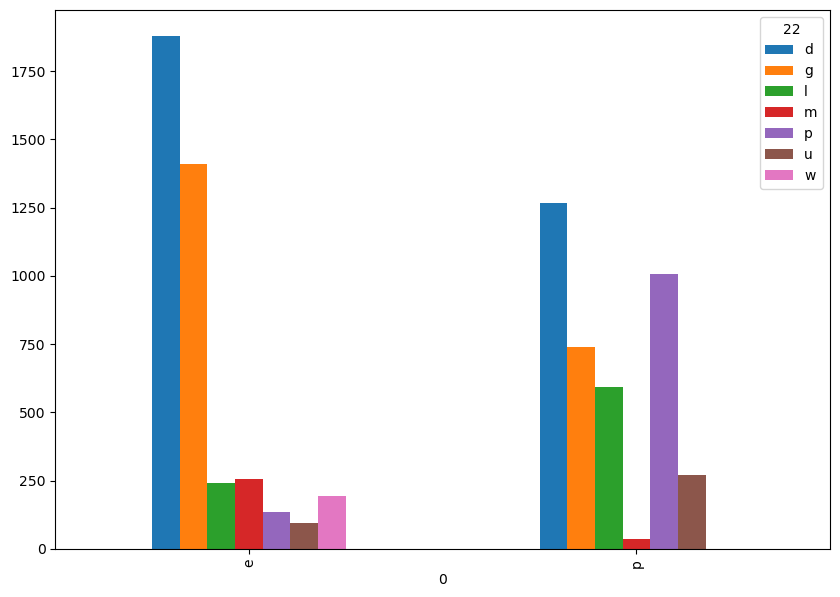

In [40]:
for feature in range(1,23):
    df.groupby(0)[feature].value_counts().unstack().fillna(0).plot.bar(figsize=(10,7))

# 2. Решающая функция на основе частот указанного признака

In [41]:
f9 = df.groupby(9)[0].value_counts().unstack().fillna(0)
f9['prob'] = (f9['p']+1)/(f9['p']+f9['e']+2)#f9.sum(axis=1)
f9['pred'] = f9['prob'].map(lambda x: 'e' if x<0.5 else 'p')
f9

,e,p,prob,pred
9,,,,
b,0.0,1728.0,0.999422,p
e,96.0,0.0,0.010204,e
g,248.0,504.0,0.669761,p
h,204.0,528.0,0.720708,p
k,344.0,64.0,0.158537,e
n,936.0,112.0,0.107619,e
o,64.0,0.0,0.015152,e
p,852.0,640.0,0.429050,e
r,0.0,24.0,0.961538,p


In [42]:
def solver(df, feature_number, x):
    errors = 0
    frequencies = df.groupby(feature_number)[0].value_counts().unstack().fillna(0)
    frequencies['prob'] = (frequencies['p']+1)/(frequencies['p']+frequencies['e']+2)
    frequencies['pred'] = frequencies['prob'].map(lambda x: 'e' if x<0.5 else 'p')
    feature_value = x.loc[feature_number]
    return frequencies.loc[feature_value]['pred']


In [43]:
errors = 0
feature = 5
for _, row in df.iterrows():
    if row[0] != solver(df, feature, row):
        errors += 1
errors

120

In [44]:
accuracy = pd.DataFrame(columns=['feature', 'accuracy'])
for feature in range(1,23):
    f = df.groupby(feature)[0].value_counts().unstack().fillna(0)
    false_pred = sum(min(row) for _, row in f.iterrows())
    accuracy.loc[len(accuracy)] = [f'feature {feature}', 1 - false_pred/len(df)]
accuracy

,feature,accuracy
0,feature 1,0.564254
1,feature 2,0.580502
2,feature 3,0.595273
3,feature 4,0.743968
4,feature 5,0.985229
5,feature 6,0.517971
6,feature 7,0.615953
7,feature 8,0.756278
8,feature 9,0.805022
9,feature 10,0.552930


Наиболее информативный признак - пятый

# 3. Наивный байесовский классификатор из sklearn

In [45]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Кодировщик категориальных фичей целыми числами
label_encoder = LabelEncoder()
X = df.iloc[:, 1:23]
y = df.iloc[:, 0]
# Подготовка данных для CategoricalNB классификатора
for feature in X.columns:
    X[feature] = label_encoder.fit_transform(X[feature]) 
y = label_encoder.fit_transform(y)
X

C:\Users\Mathjar\AppData\Local\Temp\ipykernel_2460\2850275687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
C:\Users\Mathjar\AppData\Local\Temp\ipykernel_2460\2850275687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
C:\Users\Mathjar\AppData\Local\Temp\ipykernel_2460\2850275687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [46]:
clf_NB = CategoricalNB()
clf_NB.fit(X, y)
predictions = clf_NB.predict(X)
# количество ошибок и точность
(predictions != y).sum(), 1 - (predictions != y).sum()/len(y)

(352, 0.9566715903495815)

Количество неверно распознаных объектов - 352, точность - 0.957

# 4. Handmade NB классификатор

$P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}$

$P(X|C) = P(x_1|C) \cdot P(x_2|C) \cdot \ldots \cdot P(x_n|C)$

$С = argmax_ C \space P(C) \cdot P(X|C)$

In [47]:
# условная вероятность P(x_i | C) признака в зависимости от класса с регуляризатором частот
ft = df.groupby(2)[0].value_counts().unstack().fillna(0).T
ft = (ft + 1).div(ft.sum(axis=1) + 2, axis=0)
ft

2,f,g,s,y
0,,,,
e,0.370784,0.000238,0.271971,0.357482
p,0.194232,0.001276,0.360643,0.444359


In [48]:
class NBClassifier:
    def fit(self, X, y):
        # априорные вероятности классов
        self.class_probs = {
            'e': y.value_counts()['e'] / len(y),
            'p': y.value_counts()['p'] / len(y)
        }
        
        self.cond_probs = {} # фреймы, содержащие условные вероятности значений признаков внутри класса
        X[0] = y
        for feature in range(1,23):
            ft = X.groupby(feature)[0].value_counts().unstack().fillna(0).T
            ft = (ft + 1).div(ft.sum(axis=1) + 2, axis=0)
            self.cond_probs[feature] = ft

    def predict(self, X):
        predictions = []
        for _, x in X.iterrows():
            e_prob = self.class_probs['e']
            p_prob = self.class_probs['p']
            for feature in range(1,23):
                e_prob *= self.cond_probs[feature].loc['e', x[feature]]
                p_prob *= self.cond_probs[feature].loc['p', x[feature]]
            if e_prob > p_prob:
                predictions.append('e')
            else:
                predictions.append('p')
        return np.array(predictions)

In [49]:
X = df.iloc[:,1:]
y = df.iloc[:, 0]
clf = NBClassifier()
clf.fit(X,y)
predictions = clf.predict(df.iloc[:,1:])
predictions[:100]
# количество ошибок и точность
(predictions != y).sum(), 1 - (predictions != y).sum()/len(y)

(352, 0.9566715903495815)

Количество неверно распознаных объектов - 352, точность - 0.957

# 5. Использование логистической регрессии

In [50]:
for i in range(1,23):
  f = df.groupby(i)[0].value_counts().unstack().fillna(0)
  f['prob'] = (f['p']+1)/(f['p']+f['e']+2)
  P = df[i].map(lambda x: f.at[x,'prob'])
  df['inv_sig%i'%i] = np.log(P) - np.log(1.0 - P) - z0
df

,0,1,2,3,4,5,6,7,8,9,...,inv_sig13,inv_sig14,inv_sig15,inv_sig16,inv_sig17,inv_sig18,inv_sig19,inv_sig20,inv_sig21,inv_sig22
0,p,x,s,n,t,p,f,c,n,k,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678
1,e,x,s,y,t,a,f,c,b,k,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-0.570718
2,e,b,s,w,t,l,f,c,b,n,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-1.866241
3,p,x,y,w,t,p,f,c,n,n,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678
4,e,x,s,g,f,n,f,w,b,k,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,-1.976493,-5.881327,-0.570718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314
8120,e,x,s,n,f,n,a,c,b,y,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,0.942414,0.972314
8121,e,f,s,n,f,n,a,c,b,n,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314
8122,p,k,y,n,f,y,f,c,n,b,...,2.773509,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,1.216813,0.942414,0.972314


In [51]:
df[[s for s in df.columns[23:] if s!='inv_sig5']]
X = df[[s for s in df.columns if (s!='inv_sig5') and (type(s) is str)]]
y = df[0]
X

,inv_sig1,inv_sig2,inv_sig3,inv_sig4,inv_sig6,inv_sig7,inv_sig8,inv_sig9,inv_sig10,inv_sig11,...,inv_sig13,inv_sig14,inv_sig15,inv_sig16,inv_sig17,inv_sig18,inv_sig19,inv_sig20,inv_sig21,inv_sig22
0,-0.059491,0.282227,-0.142373,-1.410778,0.042102,0.306625,2.113002,-1.597240,0.233724,-1.141737,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678
1,-0.059491,0.282227,0.589701,-1.410778,0.042102,0.306625,-0.767928,-1.597240,0.233724,-2.361697,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-0.570718
2,-2.040150,0.282227,-0.737281,-1.410778,0.042102,0.306625,-0.767928,-2.043379,0.233724,-2.361697,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-1.866241
3,-0.059491,0.217584,-0.737281,-1.410778,0.042102,0.306625,2.113002,-2.043379,0.233724,-1.141737,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678
4,-0.059491,0.282227,-0.172507,0.887336,0.042102,-2.291605,-0.767928,-1.597240,-0.179287,-1.141737,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,-1.976493,-5.881327,-0.570718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.036790,0.282227,-0.142373,0.887336,-2.246334,0.306625,-0.767928,-0.966976,0.233724,0.964915,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314
8120,-0.059491,0.282227,-0.142373,0.887336,-2.246334,0.306625,-0.767928,-0.966976,0.233724,0.964915,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,0.942414,0.972314
8121,0.046551,0.282227,-0.142373,0.887336,-2.246334,0.306625,-0.767928,-2.043379,0.233724,0.964915,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314
8122,1.036790,0.217584,-0.142373,0.887336,0.042102,0.306625,2.113002,7.527215,-0.179287,0.964915,...,2.773509,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,1.216813,0.942414,0.972314


In [53]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, solver='liblinear', penalty = 'l1')
clf.fit(X, y)
predictions = clf.predict(X)
(predictions != y).sum(), 1 - (predictions != y).sum()/len(y)
# (predictions != y).sum()

(247, 0.9695962580009847)